In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [13]:
df_2019 = pd.read_csv('./2019.csv')
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [14]:
df_2015 = pd.read_csv('./2015.csv')
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [45]:
df_2019_final = df_2019
df_2015_final = df_2015[['Country', 'Region']]

df_2019_final = df_2019_final.rename(columns={"Country or region": "Country", "GDP per capita": "GDP"})

result = pd.merge(df_2019_final, df_2015_final, on="Country")
result.head()

,Overall rank,Country,Score,GDP,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe


My first idea was to understand the regions that has the highest Happiness Score, by region because it was better to compare countries in the same region. For that, I created a dataframe based on the regions and added the mean happiness score.

For that, I need to merge both 2019 and 2015 to get the Region on that dataframe (because this information was not showed on the dataset of 2019).

In [46]:
df_regions_happiness = result.groupby('Region')['Score'].mean().reset_index(name='Mean Happiness Score')

# sort the value by the score
df_regions_happiness = df_regions_happiness.sort_values(by=['Mean Happiness Score'], ascending=False)

print(df_regions_happiness)

                            Region  Mean Happiness Score
0        Australia and New Zealand              7.267500
5                    North America              7.085000
9                   Western Europe              6.898400
3      Latin America and Caribbean              5.942550
2                     Eastern Asia              5.688833
1       Central and Eastern Europe              5.571786
6                Southeastern Asia              5.273667
4  Middle East and Northern Africa              5.237000
7                    Southern Asia              4.526857
8               Sub-Saharan Africa              4.314611


Creating the individual representation of the Happiness Score to analyse the outliers per region.

My idea was create a individual representation by each Region on the dataset to represent the Happiness Score of the countries. For creating this, I made a list of the regions on the dataset and filtered by region, after that, I added a scale to represent all the boxplots in the same scale.

It was possible to see the variation of each region and notice the outlier on the Latin America region.


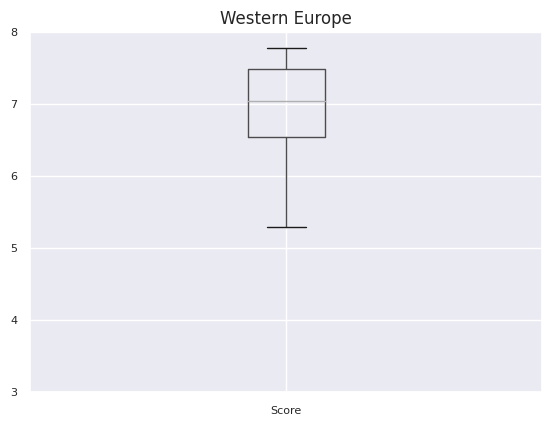

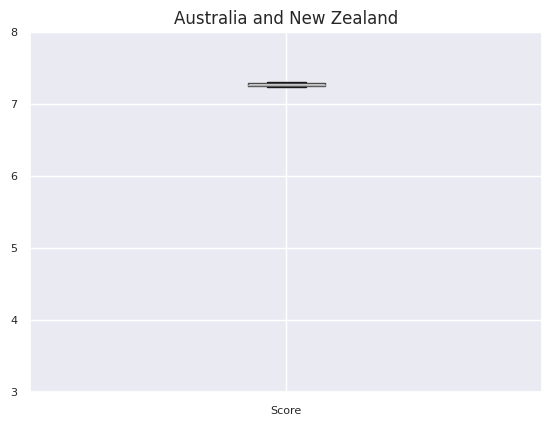

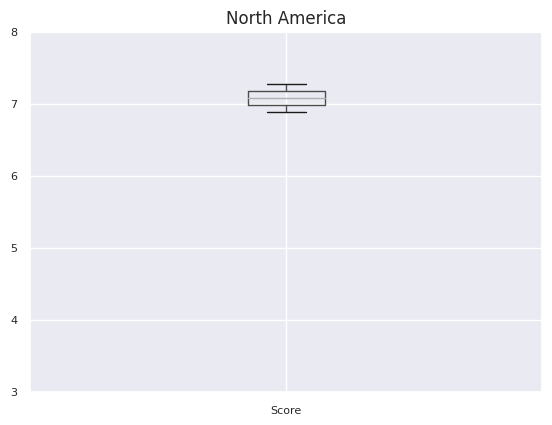

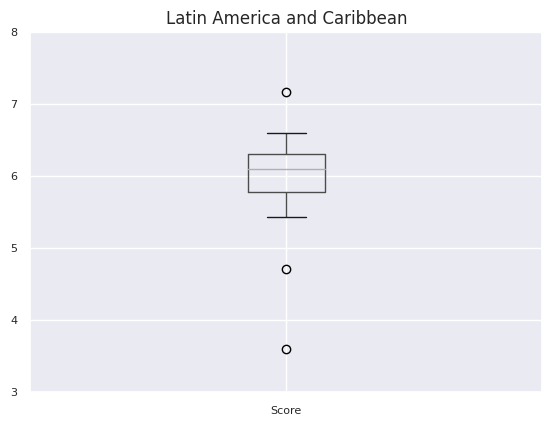

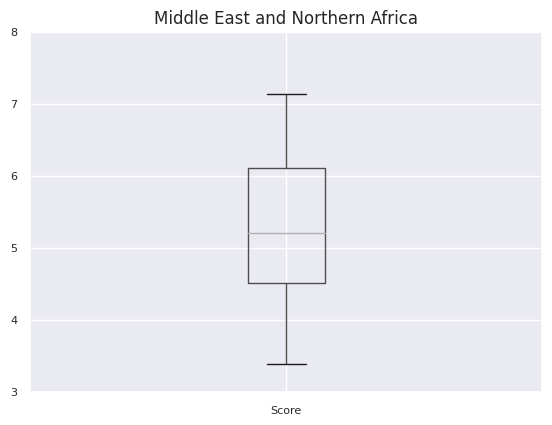

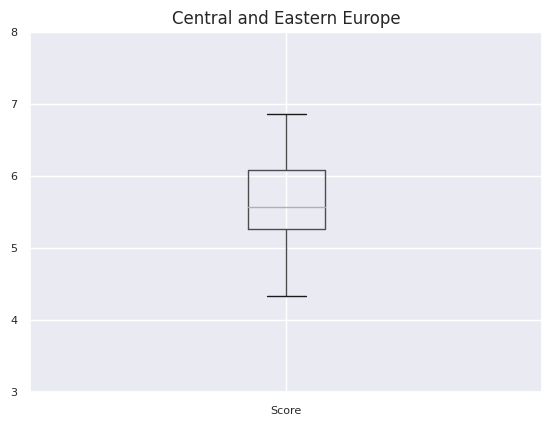

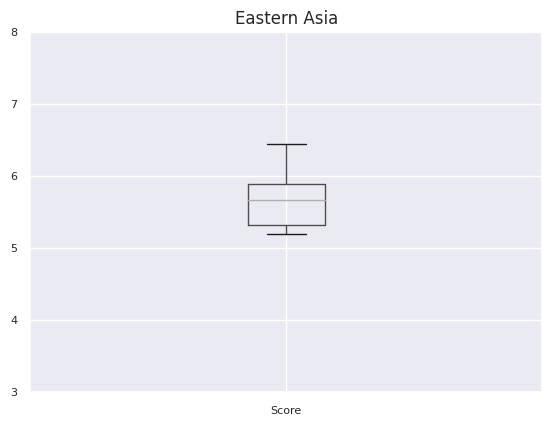

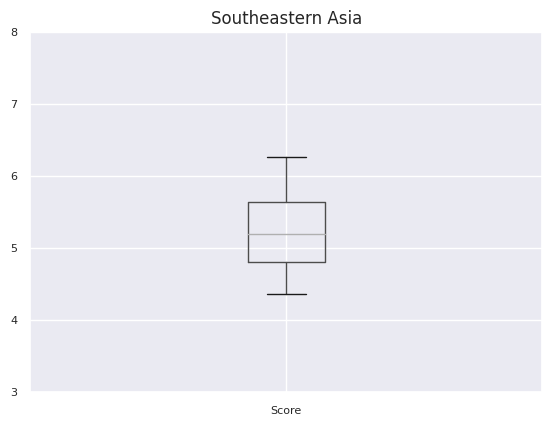

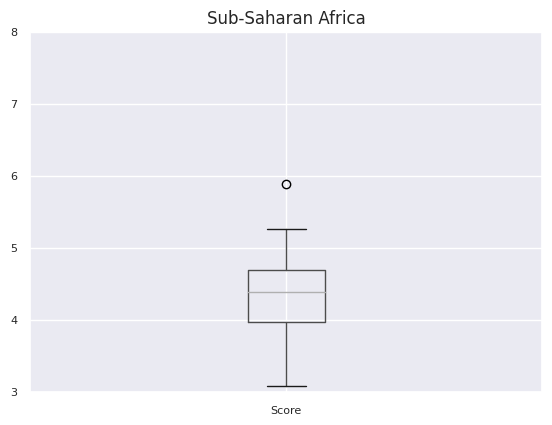

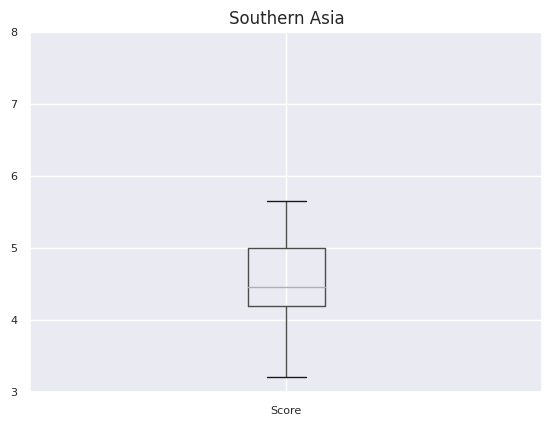

In [48]:
# creating a dynamic list of reagions existing
regions = result["Region"].unique()

for i in regions:
    # filtering by region and creating a boxplot to visualize the region data per happiness score
    temporary_df = result[result.Region == i]
    temporary_df.groupby("Region").boxplot(column="Score", fontsize=8);

    # setting the y scale to have a better overview
    plt.ylim(3, 8)


To understand better the previous result, I wanted to verify which is the country that has less and more score on the Latin American and Sub-Saharan Africa (the outlier represented on the boxplot).

In [49]:
df_latin_america = result[result.Region == 'Latin America and Caribbean']
df_latin_america = df_latin_america.sort_values(by=['Score'], ascending=True)

df_latin_america.head()

,Overall rank,Country,Score,GDP,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
140,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,Latin America and Caribbean
104,108,Venezuela,4.707,0.960,1.427,0.805,0.154,0.064,0.047,Latin America and Caribbean
74,77,Dominican Republic,5.425,1.015,1.401,0.779,0.497,0.113,0.101,Latin America and Caribbean
62,65,Peru,5.697,0.960,1.274,0.854,0.455,0.083,0.027,Latin America and Caribbean
61,63,Paraguay,5.743,0.855,1.475,0.777,0.514,0.184,0.080,Latin America and Caribbean


In [50]:
df_latin_america = result[result.Region == 'Latin America and Caribbean']
df_latin_america = df_latin_america.sort_values(by=['Score'], ascending=False)

df_latin_america.head()

,Overall rank,Country,Score,GDP,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
11,12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093,Latin America and Caribbean
22,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073,Latin America and Caribbean
25,26,Chile,6.444,1.159,1.369,0.920,0.357,0.187,0.056,Latin America and Caribbean
26,27,Guatemala,6.436,0.800,1.269,0.746,0.535,0.175,0.078,Latin America and Caribbean
30,31,Panama,6.321,1.149,1.442,0.910,0.516,0.109,0.054,Latin America and Caribbean


In [51]:
df_sub_saharan_africa = result[result.Region == 'Sub-Saharan Africa']
df_sub_saharan_africa = df_sub_saharan_africa.sort_values(by=['Score'], ascending=False)

df_sub_saharan_africa.head()

,Overall rank,Country,Score,GDP,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
55,57,Mauritius,5.888,1.120,1.402,0.798,0.498,0.215,0.060,Sub-Saharan Africa
81,85,Nigeria,5.265,0.696,1.111,0.245,0.426,0.215,0.041,Sub-Saharan Africa
92,96,Cameroon,5.044,0.549,0.910,0.331,0.381,0.187,0.037,Sub-Saharan Africa
94,98,Ghana,4.996,0.611,0.868,0.486,0.381,0.245,0.040,Sub-Saharan Africa
95,99,Ivory Coast,4.944,0.569,0.808,0.232,0.352,0.154,0.090,Sub-Saharan Africa


For an analyse that could relate the Happiness and the Economy I created a plot that shows the Economy x Happiness score and paint the plot based on the Region, so it's possible to see the clear concentration of this relation on the countries of Sub-Saharan Africa on the left down of the plot.

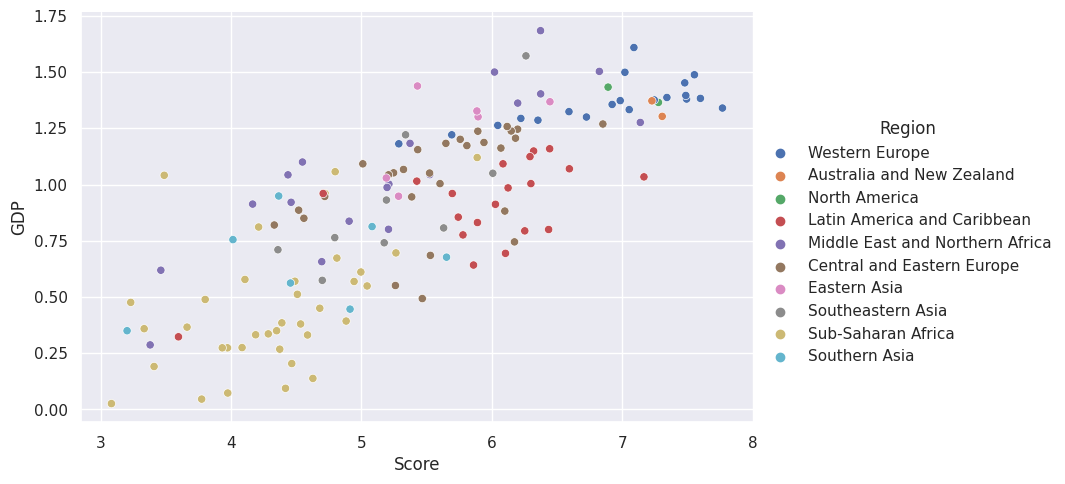

In [52]:
df_happiness_economy = result

# creating the scatter plot
sns.relplot(data=df_happiness_economy, x='Score', y='GDP', hue='Region', aspect=1.61)
plt.show()

Another question that I made to myself is if there's a relation between aspects on the dataset with the score, and how much is this correlation between those datas. For this, I created the heatmap to see the relation between the data ana analyse it.

<ipython-input-68-6159c9f1323d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(correlation.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


<AxesSubplot:>

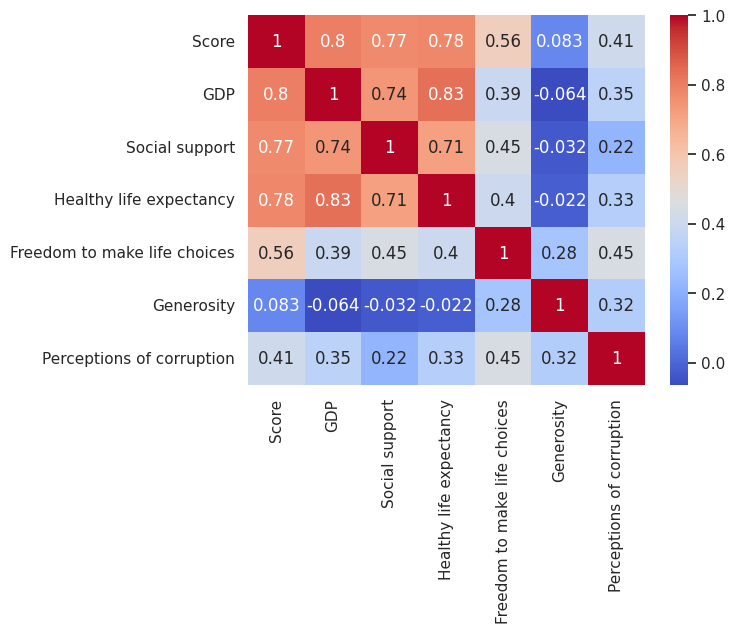

In [68]:
correlation = result[['Country','Score', 'GDP', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

sns.heatmap(correlation.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
